<a href="https://colab.research.google.com/github/JuanCappelletti/Consteel_H06/blob/main/ANALISIS%20FLUIDOS%20GASEOSOS%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [153]:
from operator import truediv
import numpy as np
import pandas as pd
url='https://raw.githubusercontent.com/JuanCappelletti/Consteel_H06/main/Trend280922.csv'
datos = pd.read_csv(url,sep=";",decimal=",",index_col=0)
df=pd.DataFrame(datos)
n=160
#df.head()
#df.info()
# segmentan para la curva
for i in range(1,960):
  if i<=160:df1=df.iloc[:160]
  if (i>160 and i<=320):df2=df.iloc[160:320]
  if (i>320 and i<=480):df3=df.iloc[320:480]
  if (i>480 and i<=640):df4=df.iloc[480:640]
  if (i>640 and i<=800):df5=df.iloc[640:800]
  if (i>800 and i<=960):df6=df.iloc[800:960]





In [154]:
import matplotlib.pyplot as plt
def GRAFICAR_Q (T):
  fig, ax = plt.subplots(1, figsize=(60,15))
  fig.suptitle('CAUDAL DE ENTRADA SIDERCA',fontsize=30)
  q=T.FQI161
  x=T.Time
  ax.plot(x,q ,color="Blue",label="FQI_161 entrada")
  p,=ax.plot(x,q,'o',color="red")
  plt.grid(visible=True,which='major',color='#666666',linestyle='-')
  fig.autofmt_xdate()
  plt.show()
def GRAFICAR_P(T):
  fig1, ax0 = plt.subplots(1, figsize=(60,15))
  fig1.suptitle('PRESION DE ENTRADA SIDERCA',fontsize=30)
  p=T.PIR161
  x=T.Time
  ax0.plot(x,p ,color="Blue",label="FQI_161 entrada")
  p,=ax0.plot(x,p,'o',color="red")
  plt.grid(visible=True,which='major',color='#666666',linestyle='-')
  fig1.autofmt_xdate()
  plt.show()

# ***Trends de caudal y presión caudalimetro entrada.***

In [155]:
T=df4

In [ ]:
GRAFICAR_Q(T)

In [ ]:
GRAFICAR_P(T)

# ***Analisis de maximos y minimos***

In [ ]:
print(df.FQI161.describe(),df.PIR161.describe())


# ***Muestreo:***

In [ ]:
n_muestras=10
dfmax=df.nlargest(n_muestras,'PIR161')
#print(dfmax)
dfmin=df.nsmallest(n_muestras,'PIR161')
#print(dfmin)
dfa=(df.loc[df.loc[:, 'PIR161'] <= 12.9])
print(dfa.nlargest(n_muestras,'PIR161'))

In [186]:
def GRAFICO_BARRA(B):
  fig3, (ax,ax0) = plt.subplots(2,1, figsize=(40,20))

  bar1=np.arange(len(B.Time))
  bar2=[i+0.3 for i in bar1]

  ax.bar(bar1,B.FQI161/1000,0.2,color="red",alpha=0.5,label="Total(FQI161)")
  ax.bar(bar2,B.FQI165/1000,0.3,color="blue",label="EAF4(FQI165)")
  ax.bar(bar2,B.FQI169/1000,0.3,bottom=B.FQI165/1000,color="green")
  ax.bar(bar2,B.FQI177/1000,0.3,bottom=(B.FQI165+B.FQI169)/1000,color="yellow")
  ax.bar(bar2,B.FQI173/1000,0.3,bottom=(B.FQI165+B.FQI169+B.FQI177)/1000,color="violet")
  ax.bar(bar2,B.FQI151/1000,0.3,bottom=(B.FQI165+B.FQI169+B.FQI177+B.FQI173)/1000,color="grey")
  plt.xticks(bar1,B.Time)
  ax.grid(visible=True,which='major',color='#666666',linestyle='-')
  ax0.plot(bar1,B.PIR161)
  p,=ax0.plot(B.Time,B.PIR161,'o',color="black")
  ax0.grid(visible=True,which='major',color='#666666',linestyle='-')
  fig3.autofmt_xdate()
  ax.legend(fontsize=15)
  plt.show()

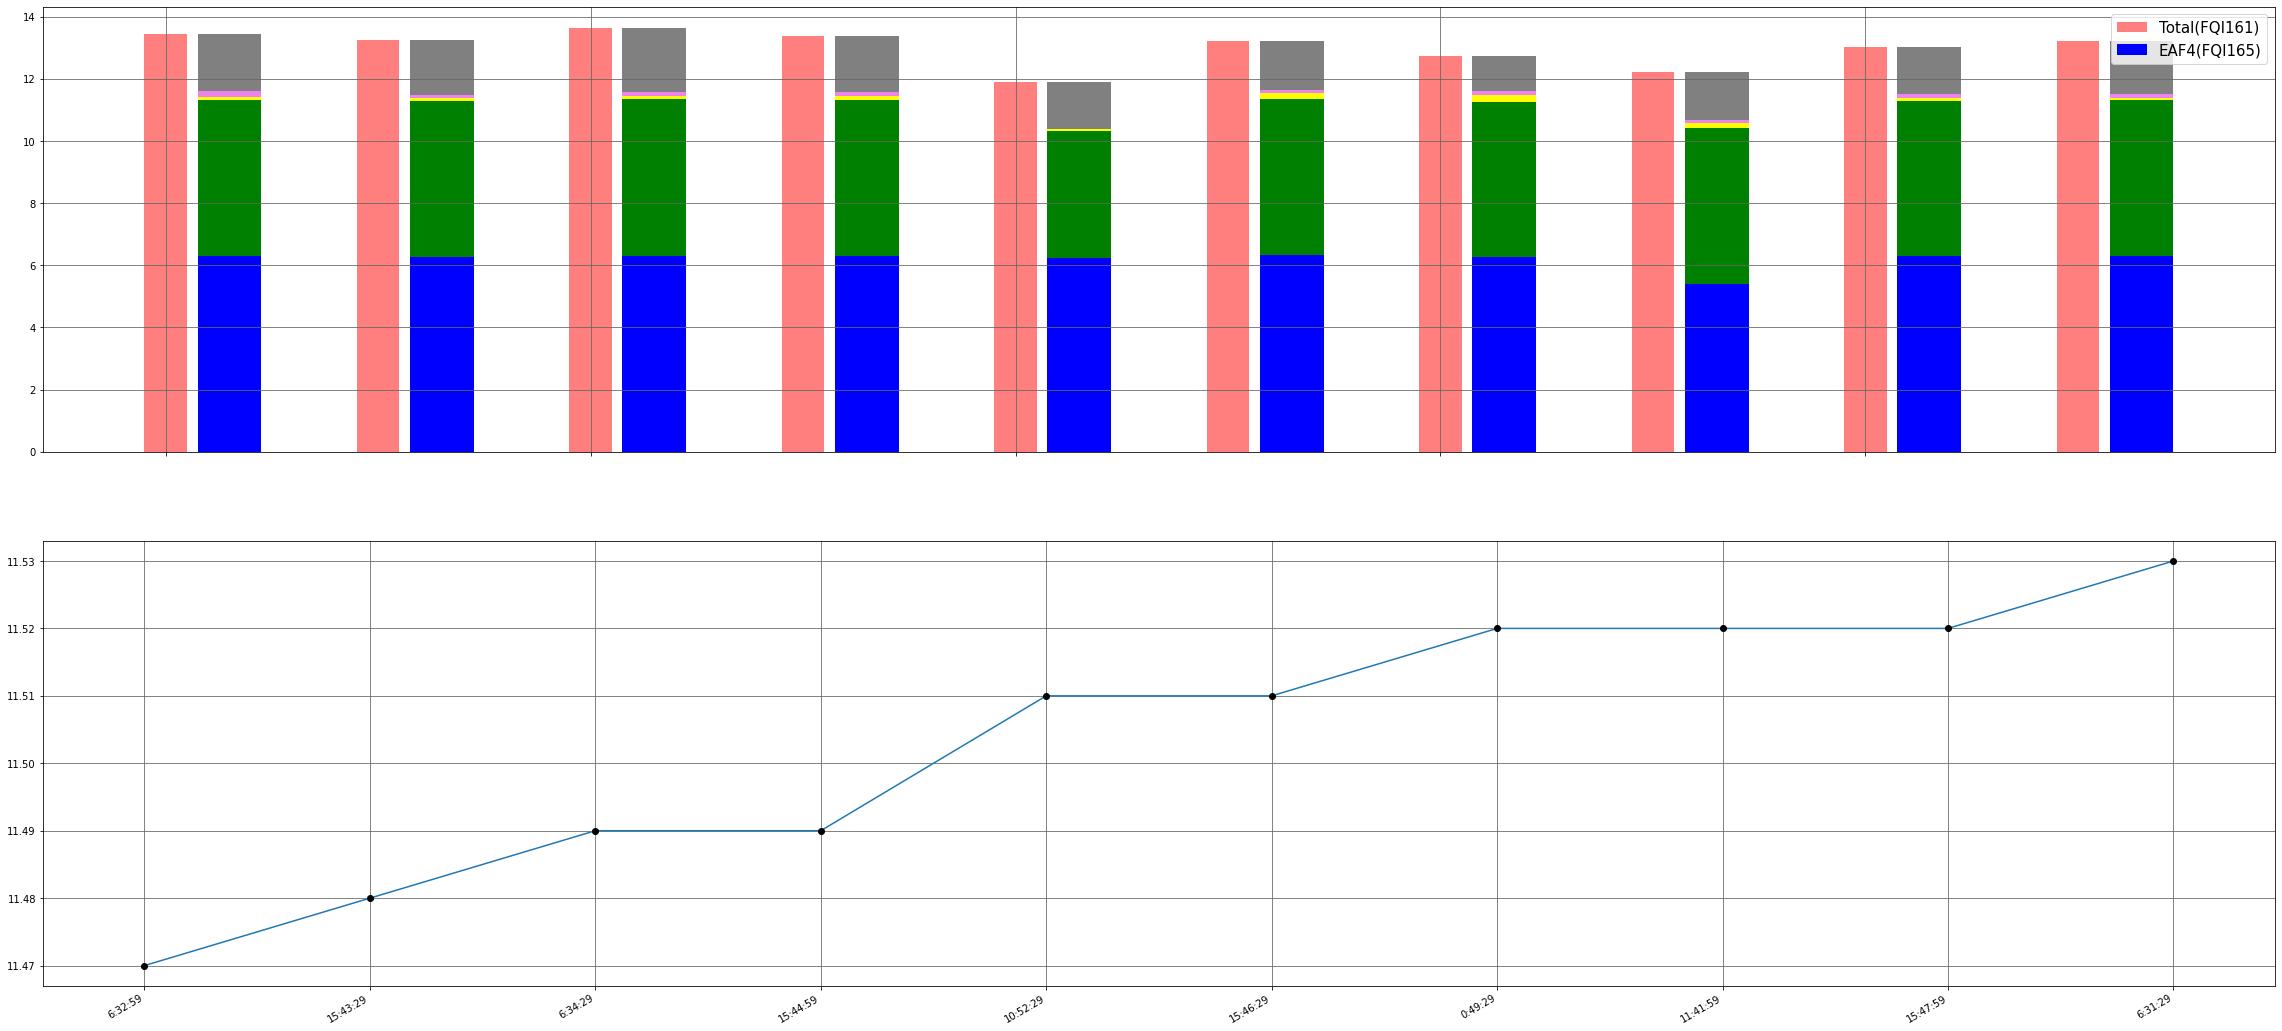

In [187]:
b=dfmin

GRAFICO_BARRA(b)